In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [40]:
batch_size = 128
momentum_value = 0.9
epochs = 20
learning_rate = 0.01

In [42]:
torch.manual_seed(1)
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])),
     batch_size=batch_size, shuffle=True, **kwargs)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



NameError: name 'kwargs' is not defined

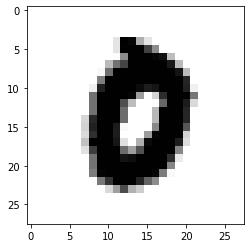

In [32]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

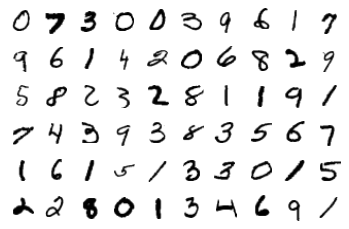

In [33]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [34]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [35]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [36]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-8.4684e-05, -8.4684e-05, -8.4684e-05,  ..., -8.4684e-05,
         -8.4684e-05, -8.4684e-05],
        [-3.7324e-04, -3.7324e-04, -3.7324e-04,  ..., -3.7324e-04,
         -3.7324e-04, -3.7324e-04],
        [ 4.7302e-04,  4.7302e-04,  4.7302e-04,  ...,  4.7302e-04,
          4.7302e-04,  4.7302e-04],
        ...,
        [ 8.2410e-04,  8.2410e-04,  8.2410e-04,  ...,  8.2410e-04,
          8.2410e-04,  8.2410e-04],
        [ 2.5163e-04,  2.5163e-04,  2.5163e-04,  ...,  2.5163e-04,
          2.5163e-04,  2.5163e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])


In [37]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.627570756232497
Epoch 1 - Training loss: 0.283261456985527
Epoch 2 - Training loss: 0.21939768349088584
Epoch 3 - Training loss: 0.17817920831038053
Epoch 4 - Training loss: 0.14729792360804164
Epoch 5 - Training loss: 0.12656446730793475
Epoch 6 - Training loss: 0.11251900257614217
Epoch 7 - Training loss: 0.09903798729622129
Epoch 8 - Training loss: 0.09012599405782945
Epoch 9 - Training loss: 0.0805417114619547
Epoch 10 - Training loss: 0.07407493556617324
Epoch 11 - Training loss: 0.06708062199879684
Epoch 12 - Training loss: 0.06173649555725504
Epoch 13 - Training loss: 0.056163382100642346
Epoch 14 - Training loss: 0.05221535453745631

Training Time (in minutes) = 2.4400952816009522


In [43]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.975
